<a href="https://colab.research.google.com/github/kishor-cypto/projects/blob/main/ArsenicProject_ANN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
dataset_path = "/content/drive/MyDrive/dataset/Augmented"

img_size = (128, 128)
batch_size = 32

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
      image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 8893 files belonging to 2 classes.
Using 7115 files for training.
Found 8893 files belonging to 2 classes.
Using 1778 files for validation.
Classes: ['infected', 'not_infected']


In [3]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [4]:
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,330,818 (96.63 MB)

 Trainable params: 25,330,818 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)


Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 836s 4s/step - accuracy: 0.5473 - loss: 4.6891 - val_accuracy: 0.6198 - val_loss: 0.7856
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 149s 666ms/step - accuracy: 0.6435 - loss: 0.6857 - val_accuracy: 0.6822 - val_loss: 0.5884
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 143s 640ms/step - accuracy: 0.6468 - loss: 0.6512 - val_accuracy: 0.5990 - val_loss: 0.8515
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 143s 636ms/step - accuracy: 0.6326 - loss: 0.6500 - val_accuracy: 0.6687 - val_loss: 0.6291
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 150s 671ms/step - accuracy: 0.6649 - loss: 0.6033 - val_accuracy: 0.6603 - val_loss: 0.6532
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 154s 691ms/step - accuracy: 0.6658 - loss: 0.5949 - val_accuracy: 0.6339 - val_loss: 0.5976
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 151s 674ms/step - accuracy: 0.6524 - loss: 0.6127 - val_accuracy: 0.7154 - val_loss: 0.5656
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 154s 687ms/step - accuracy: 0.6527 - lo

In [6]:
loss, acc = model.evaluate(test_ds)
print("Test Accuracy =", acc)


56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.7139 - loss: 0.5755
Test Accuracy = 0.7165354490280151


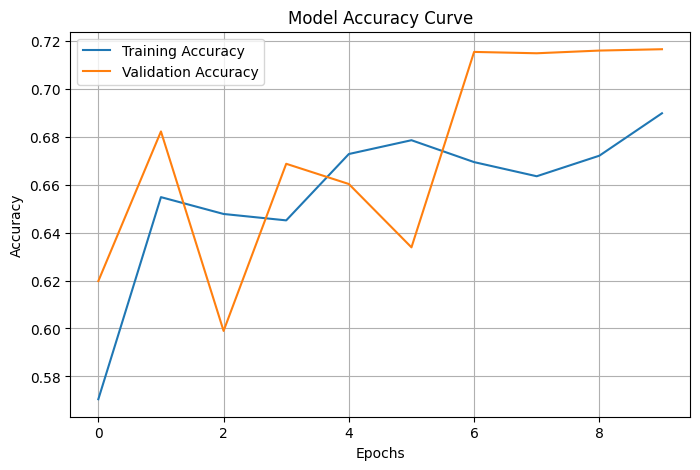

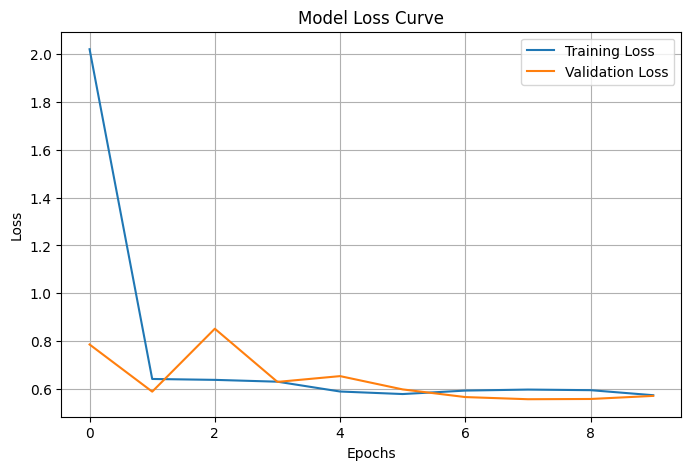

In [7]:
# ============================
# 📈 MODEL ACCURACY & LOSS PLOTS
# ============================
import matplotlib.pyplot as plt

# -------- Accuracy Curve --------
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# -------- Loss Curve --------
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [9]:
img_path = "/content/drive/MyDrive/dataset/not_infected.png"

img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print("Prediction:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: not_infected
